In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose the .zip file of your folder

Saving data-20250124T105436Z-001.zip to data-20250124T105436Z-001.zip


In [ ]:
# Unzip the folder
import zipfile
with zipfile.ZipFile('/content/data-20250124T105436Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

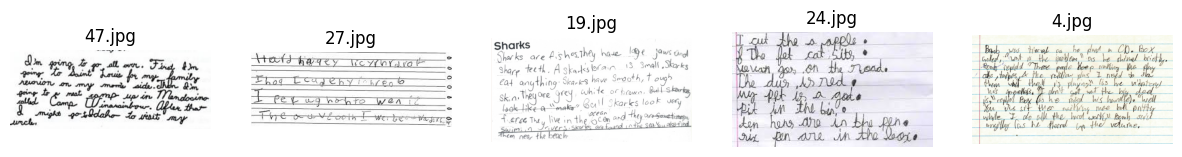

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Assuming your images are in subfolders within /content/dataset/data
data_dir = '/content/dataset/data'

# Function to display images
def display_images(image_paths, num_images=5):
    fig, axes = plt.subplots(1, min(num_images, len(image_paths)), figsize=(15, 5))
    for i, image_path in enumerate(image_paths[:num_images]):
        try:
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib
            axes[i].imshow(img)
            axes[i].set_title(os.path.basename(image_path))
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    plt.show()

# List to store image paths
image_files = []

# Walk through the directory and collect images
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_files.append(os.path.join(root, file))

# Display a few sample images
display_images(image_files)

**Dataset Statistics**

Knowing statistics like image dimensions, file sizes, and color channels helps determine if resizing or other preprocessing steps are necessary.

In [ ]:
from PIL import Image
import numpy as np

def dataset_statistics(data_dir):
    dimensions = []
    sizes = []
    color_channels = set()

    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    dimensions.append(img.size)
                    sizes.append(os.path.getsize(file_path))
                    color_channels.add(img.mode)

    print(f"Total Images: {len(dimensions)}")
    print(f"Average Dimensions: {np.mean(dimensions, axis=0)}")
    print(f"Image Size Range: {min(sizes)} bytes to {max(sizes)} bytes")
    print(f"Color Channels: {color_channels}")

# Usage
dataset_statistics(data_dir)

Total Images: 100
Average Dimensions: [561.76 415.95]
Image Size Range: 8553 bytes to 887264 bytes
Color Channels: {'P', 'RGB', 'RGBA', 'L'}


In [ ]:
# prompt: also show pixels

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
import os
import cv2
from PIL import Image

# ... (Your existing code)

# Function to display images with pixel information
def display_images_with_pixels(image_paths, num_images=5):
    fig, axes = plt.subplots(1, min(num_images, len(image_paths)), figsize=(15, 5))
    for i, image_path in enumerate(image_paths[:num_images]):
        try:
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].set_title(f"{os.path.basename(image_path)}\nShape: {img.shape}")  # Display shape
            axes[i].axis('off')

            # Print pixel values for a small region (optional, can be adjusted)
            #print(f"Pixel values for a region of {os.path.basename(image_path)}:")
            #print(img[0:5, 0:5]) #Print first 5x5 pixel values

        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    plt.show()

# ... (Rest of your existing code)

# Call the modified function
display_images_with_pixels(image_files)

**Analyze Image Dimensions**

If the dataset has varying image dimensions, you may want to resize them for model compatibility. A histogram of image dimensions can reveal if most images are of a similar size.

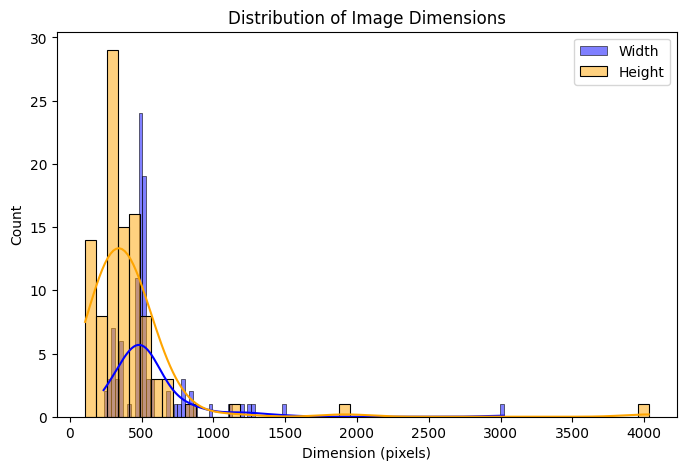

In [ ]:
import seaborn as sns

def plot_image_dimensions(data_dir):
    dimensions = []

    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    dimensions.append(img.size)

    width, height = zip(*dimensions)
    plt.figure(figsize=(8, 5))
    sns.histplot(width, color='blue', label='Width', kde=True)
    sns.histplot(height, color='orange', label='Height', kde=True)
    plt.legend()
    plt.xlabel('Dimension (pixels)')
    plt.title('Distribution of Image Dimensions')
    plt.show()

# Usage
plot_image_dimensions(data_dir)

**Class Distribution Analysis**

Checking the number of images per class helps identify class imbalances, which may require data augmentation.

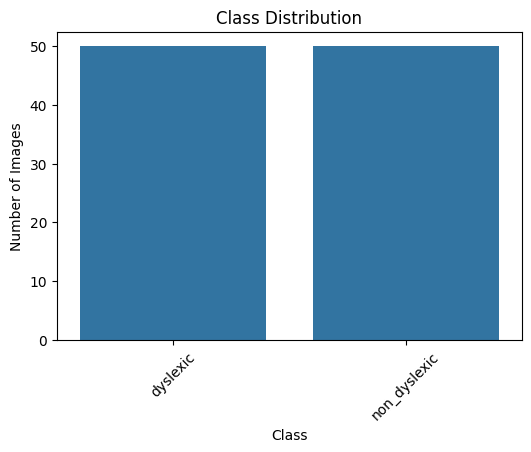

In [ ]:
import seaborn as sns
from collections import Counter

def class_distribution(data_dir):
    class_counts = Counter()

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = num_images

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Usage
class_distribution(data_dir)

**Image Mean and Standard Deviation**

Computing the mean and standard deviation for each color channel across the dataset helps with normalization, especially for deep learning models.

In [ ]:
def compute_mean_std(data_dir):
    means = []
    stds = []

    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0  # Normalize to [0, 1] range
                means.append(np.mean(img, axis=(0, 1)))
                stds.append(np.std(img, axis=(0, 1)))

    mean = np.mean(means, axis=0)
    std = np.mean(stds, axis=0)
    print(f"Mean (R, G, B): {mean}")
    print(f"Standard Deviation (R, G, B): {std}")

# Usage
compute_mean_std(data_dir)

Mean (R, G, B): [0.90630646 0.90782217 0.90501175]
Standard Deviation (R, G, B): [0.15934867 0.15863008 0.15671492]


In [ ]:
'''# import os
import shutil

# Path to the main dataset directory
data_dir = '/content/dataset/data'

# List of directories you want to delete
directories_to_delete = ['train', 'validation']  # Replace with actual directory names

for dir_name in directories_to_delete:
    dir_path = os.path.join(data_dir, dir_name)
    if os.path.isdir(dir_path):
        shutil.rmtree(dir_path)
        print(f"Deleted directory: {dir_path}")
    else:
        print(f"Directory not found: {dir_path}")'''

Deleted directory: /content/dataset/data/train
Deleted directory: /content/dataset/data/validation


**Splitting Dataset into Training and Validation Sets**

This code splits a dataset into training and validation sets using an 80-20 ratio. It ensures that the model is trained on a majority of the data while reserving a portion for validation to evaluate its performance during training.

In [ ]:
import os
import shutil
import random

# Paths to the dataset and new directories
dataset_dir = '/content/dataset/data'  # Replace with your dataset path
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

# Create directories if they don’t exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Specify the split ratio for validation set
train_ratio = 0.8  # 80% for training, 20% for validation

# Loop through each class (e.g., dyslexia and non_dyslexia)
for class_name in os.listdir(dataset_dir):
    if class_name not in ['train', 'validation']:  # Skip the newly created directories
        class_dir = os.path.join(dataset_dir, class_name)

        # Ensure we are working with directories only
        if os.path.isdir(class_dir):
            # Create class subdirectories in train and validate
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

            # Get all images in the class directory
            images = os.listdir(class_dir)
            random.shuffle(images)

            # Calculate the split index based on 80-20 ratio
            split_index = int(len(images) * train_ratio)

            # Split images for training and validation
            train_images = images[:split_index]
            validate_images = images[split_index:]

            # Move images to train directory
            for image in train_images:
                src_path = os.path.join(class_dir, image)
                dest_path = os.path.join(train_dir, class_name, image)
                shutil.copy(src_path, dest_path)

            # Move images to validate directory
            for image in validate_images:
                src_path = os.path.join(class_dir, image)
                dest_path = os.path.join(val_dir, class_name, image)
                shutil.copy(src_path, dest_path)

            # Print the count for each class to confirm
            print(f"Class '{class_name}': {len(train_images)} images in training, {len(validate_images)} images in validation")

print("Data has been split into training and validation sets.")

Class 'dyslexic': 40 images in training, 10 images in validation
Class 'non_dyslexic': 40 images in training, 10 images in validation
Data has been split into training and validation sets.


**Image Data Generators for Training and Validation**

This code uses ImageDataGenerator to preprocess and rescale images from the training and validation directories. It sets up generators to load and batch the images, ensuring they are appropriately scaled before being fed into the model for training and validation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_width, img_height = 128, 128
batch_size = 32

# ImageDataGenerators for training and validation with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

# Load images from the train and validation directories
train_generator = train_data_gen.flow_from_directory(
    '/content/dataset/data/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_data_gen.flow_from_directory(
    '/content/dataset/data/validation',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


**Model Building**

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout for regularization

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout in the dense layer
    Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,273 (49.37 MB)

 Trainable params: 12,940,801 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

**Training Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 10  # Increase the number of epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/data/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Found 80 images belonging to 2 classes.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4965 - loss: 1.0287 - val_accuracy: 0.5000 - val_loss: 0.7448
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.8438 - loss: 0.7069 - val_accuracy: 0.5000 - val_loss: 0.6835
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7917 - loss: 1.1698 - val_accuracy: 0.5500 - val_loss: 0.6615
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 699ms/step - accuracy: 0.7500 - loss: 0.5939 - val_accuracy: 0.8000 - val_loss: 0.6511
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8264 - loss: 0.5017 - val_accuracy: 0.7000 - val_loss: 0.6481
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.7812 - loss: 0.5033 - val_accuracy: 0.7000 - val_loss: 0.6568
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9028 - loss: 0.2606 - val_accuracy: 0.6000 - val_loss: 0.6675
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.8750 - loss: 0.1980 - val_

**Testing Model**

In [ ]:
# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.7000 - loss: 0.6481
Validation Accuracy: 70.00%


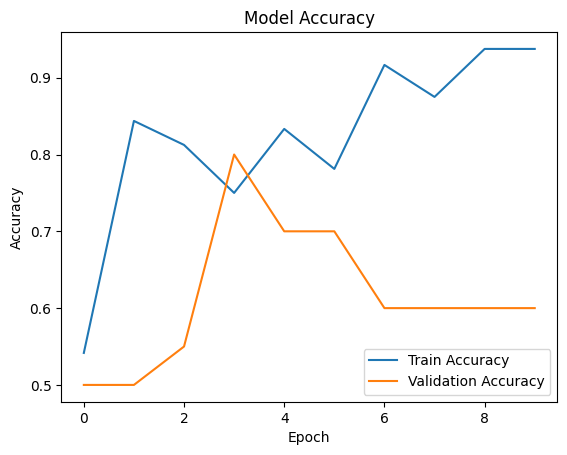

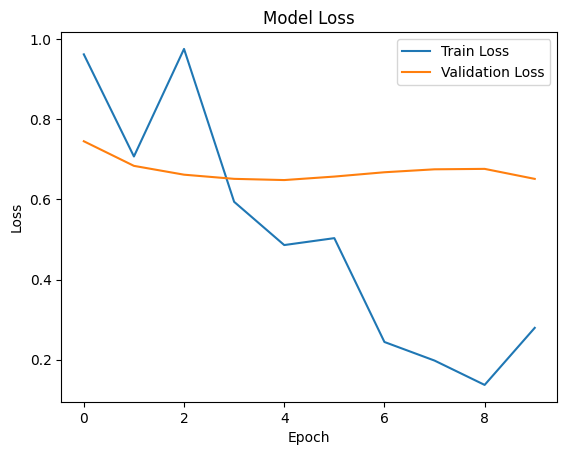

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


**Sample image testing 1**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


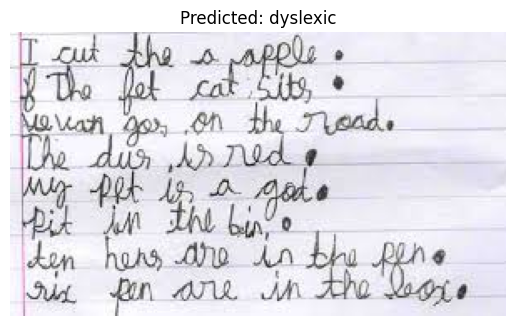

The image is classified as 'dyslexic' with confidence 0.56


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess a single image
def predict_single_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale

    # Make a prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis('off')  # Hide axis for a cleaner display
    plt.title(f"Predicted: {'non_dyslexic' if confidence > 0.5 else 'dyslexic'}")
    plt.show()

    # Print the result
    if confidence > 0.5:
        print(f"The image is classified as 'non_dyslexic' with confidence {confidence:.2f}")
    else:
        print(f"The image is classified as 'dyslexic' with confidence {1 - confidence:.2f}")

# Test with an example image path
predict_single_image('/content/dataset/data/validation/dyslexic/24.jpg')  # Replace with an actual image path


**Sample Image testing 2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


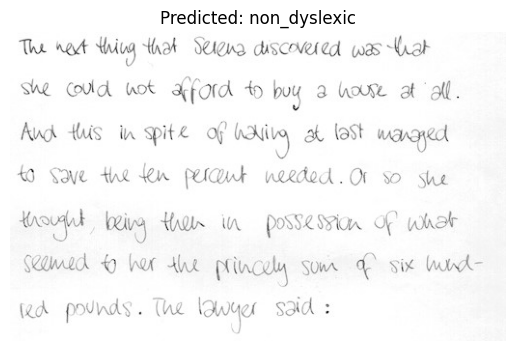

The image is classified as 'non_dyslexic' with confidence 0.53


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess a single image
def predict_single_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale

    # Make a prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis('off')  # Hide axis for a cleaner display
    plt.title(f"Predicted: {'non_dyslexic' if confidence > 0.5 else 'dyslexic'}")
    plt.show()

    # Print the result
    if confidence > 0.5:
        print(f"The image is classified as 'non_dyslexic' with confidence {confidence:.2f}")
    else:
        print(f"The image is classified as 'dyslexic' with confidence {1 - confidence:.2f}")

# Test with an example image path
predict_single_image('/content/dataset/data/validation/non_dyslexic/37.jpg')  # Replace with an actual image path


In [ ]:
import joblib
# Save the model in .sav format
joblib.dump(model, 'Dyslexia_Detection_Model.sav')

# Download the model
from google.colab import files
files.download('Dyslexia_Detection_Model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>